In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from partition_decode.plots import continuous_pairplot

# Forest

In [30]:
# Read
df = pd.read_csv('./results/xor_forest_results.csv')

# Set to floats
df.loc[df['max_depth'] == 'None', 'max_depth'] = '32' # set max depth
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass

# Create new metrics/columns
df['generalization_gap'] = df['test_01_error'] - df['train_01_error']
df['frac_activated'] = df['activated_regions'] / df['n_train_samples']

Average across reps
df = df.groupby(
    ['model', 'n_train_samples', 'n_estimators', 'max_depth'],
    as_index=False
).mean()

SyntaxError: invalid syntax (<ipython-input-30-6f43de6e54e3>, line 16)

In [31]:
df.head(5)

,model,rep,n_train_samples,n_estimators,bootstrap,max_depth,n_jobs,train_01_error,test_01_error,irm_l2,activated_regions,regions_l2,n_total_leaves,generalization_gap,frac_activated
0,forest,0.0,4096.0,1.0,0.0,2.0,-1.0,0.487061,0.4956,3848.115123,4.0,3848.115123,4.0,0.008539,0.000977
1,forest,0.0,4096.0,1.0,0.0,3.0,-1.0,0.472168,0.4770,3838.092234,8.0,3838.092234,8.0,0.004832,0.001953
2,forest,0.0,4096.0,1.0,0.0,4.0,-1.0,0.375488,0.3838,2201.326873,15.0,2201.326873,15.0,0.008312,0.003662
3,forest,0.0,4096.0,1.0,0.0,6.0,-1.0,0.260742,0.2797,1055.292377,44.0,1055.292377,44.0,0.018958,0.010742
4,forest,0.0,4096.0,1.0,0.0,8.0,-1.0,0.248535,0.2863,915.949780,83.0,915.949780,83.0,0.037765,0.020264


In [27]:
corr_vars = [
    'n_total_leaves', 'frac_activated', 'irm_l2', 'regions_l2',
    'generalization_gap', 'max_depth', 'n_estimators'
]
corr_df = df[corr_vars].corr('spearman')
display(corr_df)
corr_df.to_csv('./results/rf_spearman_corrs.csv')

,n_total_leaves,frac_activated,irm_l2,regions_l2,generalization_gap,max_depth,n_estimators
n_total_leaves,1.000000,0.988546,-0.933229,-0.977881,0.899972,0.907590,0.393832
frac_activated,0.988546,1.000000,-0.953354,-0.992529,0.905552,0.925856,0.330945
irm_l2,-0.933229,-0.953354,1.000000,0.962878,-0.944358,-0.977182,-0.093433
regions_l2,-0.977881,-0.992529,0.962878,1.000000,-0.904151,-0.923922,-0.304169
generalization_gap,0.899972,0.905552,-0.944358,-0.904151,1.000000,0.955650,0.046407
max_depth,0.907590,0.925856,-0.977182,-0.923922,0.955650,1.000000,0.000000
n_estimators,0.393832,0.330945,-0.093433,-0.304169,0.046407,0.000000,1.000000


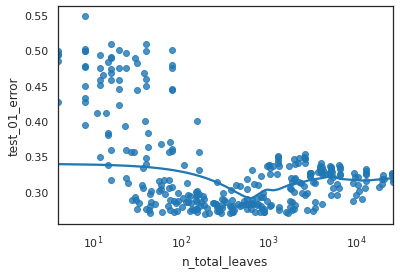

In [24]:
sns.set_style('white')
sns.set_context('notebook')
sns.regplot(data=df, x='n_total_leaves', y='test_01_error', lowess=True)
plt.xscale('log')
plt.show()

## Plot all, colored by generalization gap

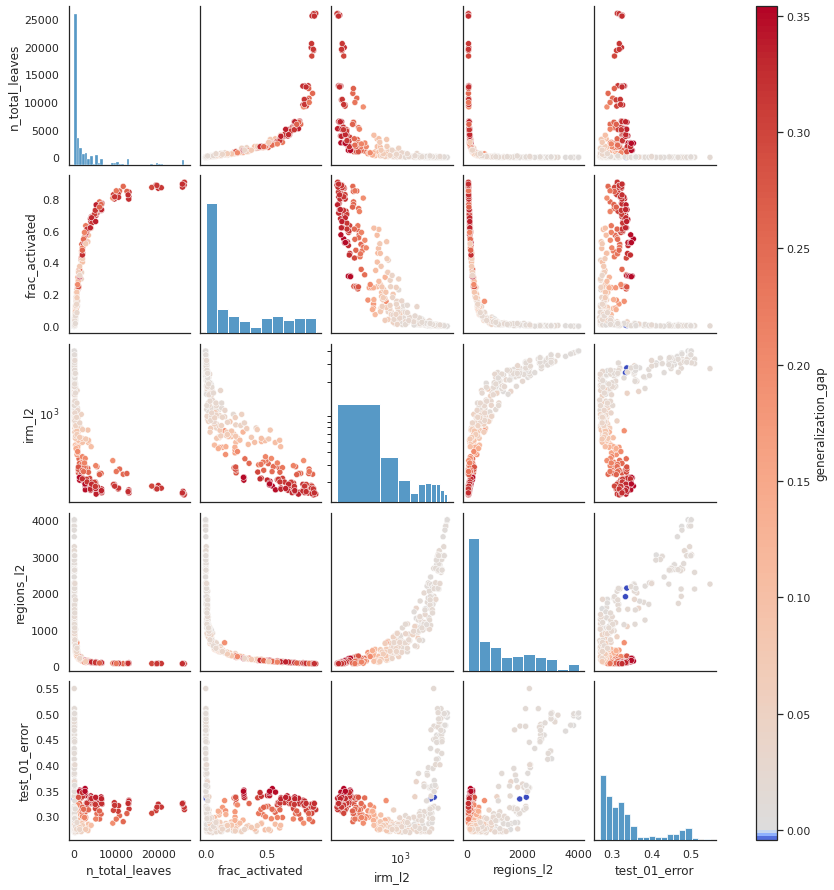

In [28]:
sns.set_context('notebook')
hue = 'generalization_gap'
variables = [
    # 'n_estimators', 'max_depth',
    'n_total_leaves', 'frac_activated', 'irm_l2', 'regions_l2',
    # 'train_01_error', 
    'test_01_error',
]
g = continuous_pairplot(
    df, vars=variables,
    hue=hue,
)
g.axes[2, 0].set_yscale('log')
g.axes[0, 2].set_xscale('log')
plt.savefig('./figures/rf_continuous_pairplot.pdf')
plt.show()

## Dynamics of complexity measures

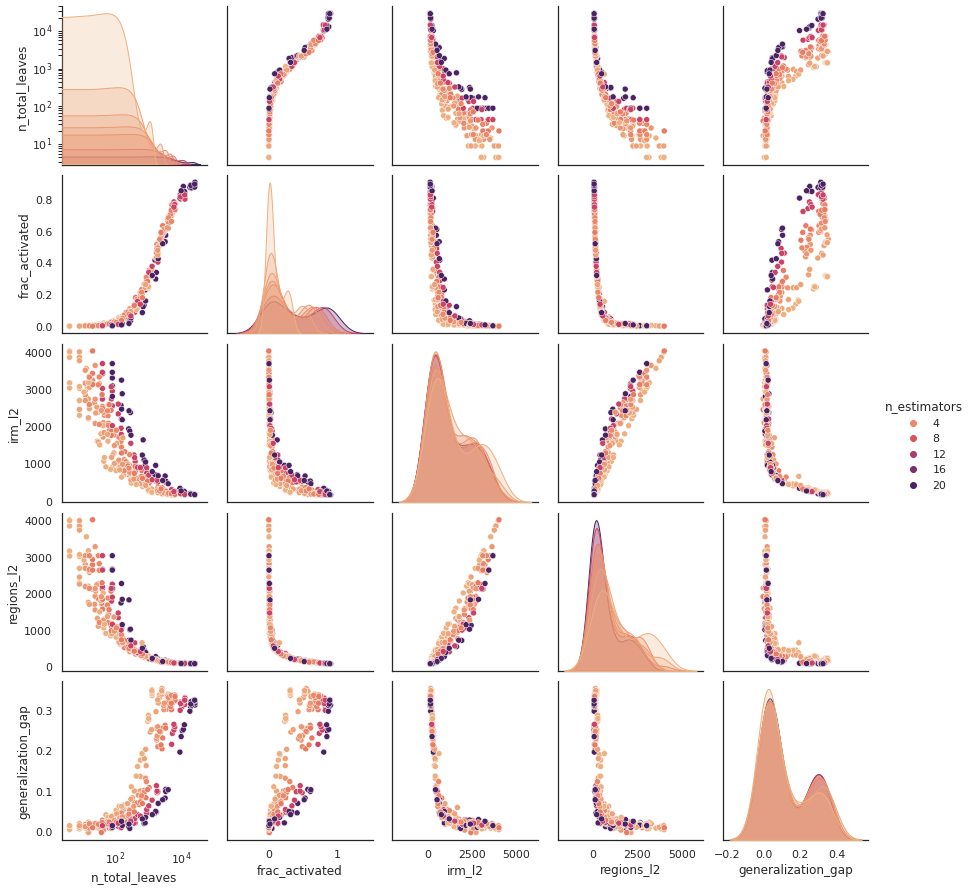

In [29]:
hue = 'n_estimators'
variables = [
    'n_total_leaves', 'frac_activated', 'irm_l2', 'regions_l2',
    'generalization_gap',
    # 'max_depth',
    # 'train_01_error', 'test_01_error'
]
g = sns.pairplot(
    df, vars=variables,
    hue=hue,
    palette='flare',
)
g.axes[0, 0].set_yscale('log')
g.axes[0, 0].set_xscale('log')
plt.savefig('./figures/rf_discrete_pairplot.pdf')
plt.show()

# Network

In [68]:
# Read
df = pd.read_csv('./results/xor_network_results.csv')

In [69]:
# Set to floats
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass

# Create new metrics/columns
df['generalization_gap'] = df['test_01_error'] - df['train_01_error']
df['frac_activated'] = df['activated_regions'] / df['n_train_samples']

# Average across reps
df = df.groupby(
    ['model', 'n_train_samples', 'hidden_layer_dims'],
    as_index=False
).mean()

In [70]:
df.head(5)

,model,n_train_samples,hidden_layer_dims,rep,num_epochs,learning_rate,batch_size,verbose,train_01_error,test_01_error,irm_l2,activated_regions,regions_l2,n_parameters,depth,width,generalization_gap,frac_activated
0,network,4096.0,100,0.0,100.0,0.01,128.0,1.0,0.579346,0.5690,282.897508,534.0,64.0,502.0,1.0,100.0,-0.010346,0.130371
1,network,4096.0,100;100,0.0,100.0,0.01,128.0,1.0,0.601807,0.5663,155.106415,212.0,64.0,10602.0,2.0,100.0,-0.035507,0.051758
2,network,4096.0,100;100;100,0.0,100.0,0.01,128.0,1.0,0.658691,0.6097,100.069976,94.0,64.0,20702.0,3.0,100.0,-0.048991,0.022949


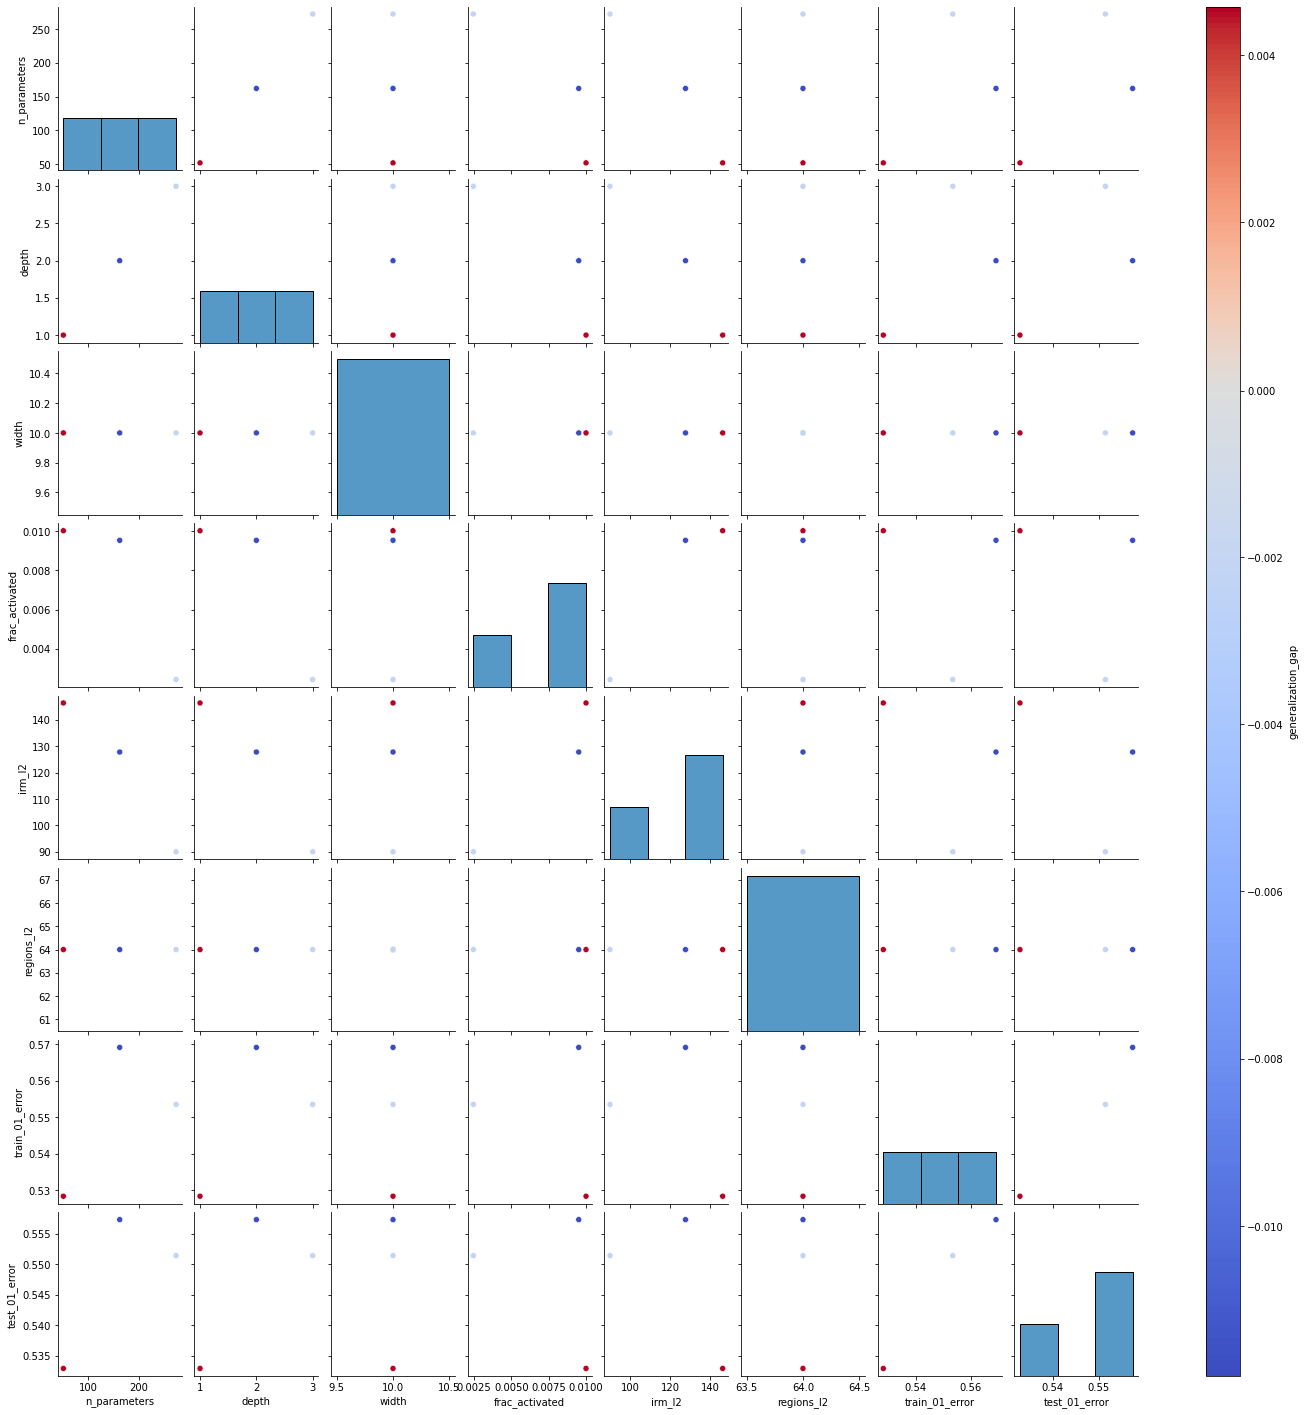

In [67]:
hue = 'generalization_gap'
variables = [
    'n_parameters', 'depth', 'width', 'frac_activated', 'irm_l2', 'regions_l2',
    'train_01_error', 'test_01_error',
]
g = continuous_pairplot(
    df, vars=variables,
    hue=hue,
)
plt.show()